In [1]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage import data
%matplotlib inline

In [2]:
def show(img):
    img2 = img[:,:,::-1]
    plt.imshow(img2)

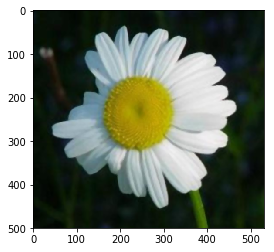

In [3]:
img = cv2.imread('Data2/flower11.jpg')
median = cv2.medianBlur(img,5)
show(median)

Text(0.5, 1.0, 'Crop')

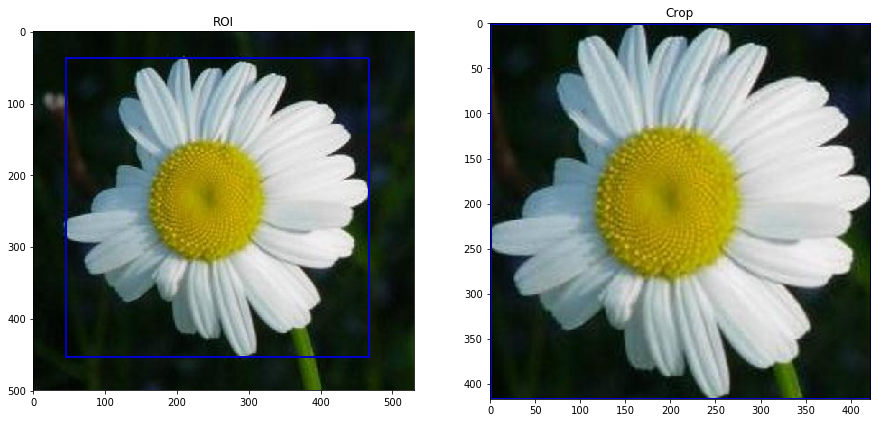

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
# threshold to get just the signature (INVERTED)
retval, thresh_gray = cv2.threshold(gray, 127, 255, 0)

contours, hierarchy = cv2.findContours(thresh_gray,cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Find object with the biggest bounding box
mx = (0,0,0,0)      # biggest bounding box so far
mx_area = 0
for cont in contours:
    x,y,w,h = cv2.boundingRect(cont)
    area = w*h
    if area > mx_area:
        mx = x,y,w,h
        mx_area = area
x,y,w,h = mx

# Output to files
roi = cv2.rectangle(img,(x,y),(x+w,y+h),(200,0,0),2)
crop = img[y:y+h,x:x+w]
fig = plt.figure(figsize=(15, 20))
plt.subplot(1,2,1),show(roi)
plt.title('ROI')
plt.subplot(1,2,2),show(crop)
plt.title('Crop')

Text(0.5, 1.0, 'Segmentation')

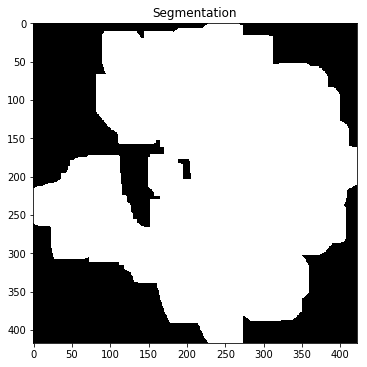

In [5]:
gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(gray)
median = cv2.medianBlur(equ,5)
ret3,th3 = cv2.threshold(median,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
kernel = np.ones((19,19), np.uint8) 
closing = cv2.morphologyEx(th3, cv2.MORPH_CLOSE, kernel)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
img_dilation = cv2.dilate(opening, kernel, iterations=1) 

fig = plt.figure(figsize=(15, 20))
plt.subplot(3,2,1),plt.imshow(img_dilation,cmap = 'gray')
plt.title('Segmentation')

In [6]:
lab = cv2.cvtColor(crop, cv2.COLOR_BGR2Lab)
median = cv2.medianBlur(lab,5)

Text(0.5, 1.0, 'Segmentation based on L')

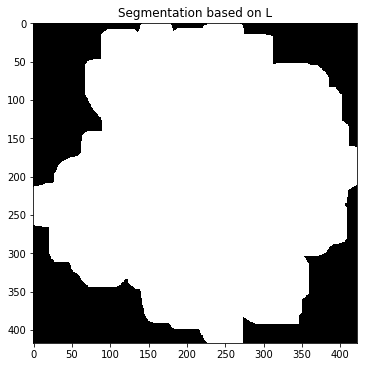

In [7]:
ret3,th3 = cv2.threshold(median[:,:,0],0,255,cv2.THRESH_OTSU)
kernel = np.ones((19,19), np.uint8) 
closing = cv2.morphologyEx(th3, cv2.MORPH_CLOSE, kernel)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
img_dilation = cv2.dilate(opening, kernel, iterations=1) 

fig = plt.figure(figsize=(15, 20))
plt.subplot(3,2,1),plt.imshow(img_dilation,cmap = 'gray')
plt.title('Segmentation based on L')

Text(0.5, 1.0, 'Segmentation')

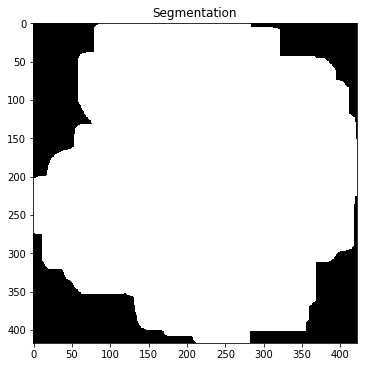

In [8]:
ret3,th3 = cv2.threshold(median[:,:,1],0,255,cv2.THRESH_OTSU)
kernel = np.ones((19,19), np.uint8) 
closing = cv2.morphologyEx(img_dilation, cv2.MORPH_CLOSE, kernel)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
img_dilation = cv2.dilate(opening, kernel, iterations=1) 


fig = plt.figure(figsize=(15, 20))
plt.subplot(3,2,1),plt.imshow(img_dilation,cmap = 'gray')
plt.title('Segmentation')

Text(0.5, 1.0, 'Segmentation based on b')

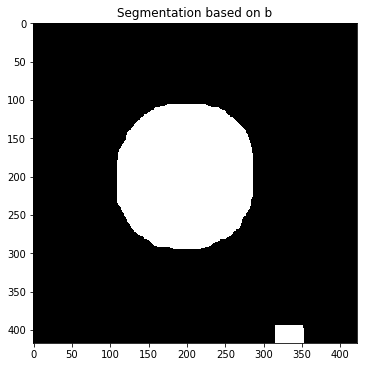

In [9]:
ret3,th3 = cv2.threshold(median[:,:,2],0,255,cv2.THRESH_OTSU)
kernel = np.ones((19,19), np.uint8)
closing = cv2.morphologyEx(th3, cv2.MORPH_CLOSE, kernel)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
img_dilation = cv2.dilate(opening, kernel, iterations=1)

fig = plt.figure(figsize=(15, 20))
plt.subplot(3,2,1),plt.imshow(img_dilation,cmap = 'gray')
plt.title('Segmentation based on b')

Text(0.5, 1.0, 'Mask')

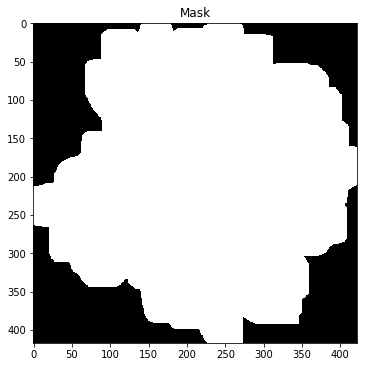

In [19]:
img_contours = cv2.findContours(img_dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
img_contours = sorted(img_contours, key=cv2.contourArea)
for i in img_contours:
    if cv2.contourArea(i) > 100:
        break
mask = np.zeros(crop.shape[:2], np.uint8)
x = cv2.drawContours(mask, [i],-1, 255, -1)
fig = plt.figure(figsize=(15, 20))
plt.subplot(3,2,1),plt.imshow(x,cmap = 'gray')
plt.title('Mask')

Text(0.5, 1.0, 'Result')

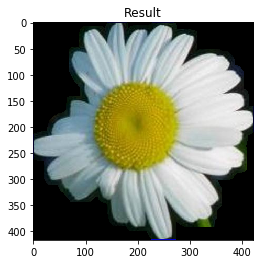

In [22]:
result = cv2.bitwise_and(crop,crop,mask = mask)
show(result)
plt.title('Result')

In [20]:
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,100,200)